**The Employment of Text Analytics in Pacific Islands Countries**

October 24, 2023

In [1]:
import os

os.chdir("../../")
import pandas as pd
import numpy as np
from src.text.epu import *
import matplotlib.pyplot as plt
from IPython.display import HTML, display, Image
# from PIL import Image
from tqdm import tqdm

In [2]:
sib_epu = os.getcwd() + "/outputs/text/solomon_islands/sib_epu.jpg"
png_epu = os.getcwd() + "/outputs/text/png/png_epu.jpg"
sib_topic = os.getcwd() + "/outputs/text/solomon_islands/sib_ldavis.html"
png_topic = os.getcwd() + "/outputs/text/png/png_ldavis.html"
png_job_network = os.getcwd() + "/outputs/text/png/png_job_graph.html"

## Economic Policy Uncertainty

 - Baker, Bloom, and Davis (2016) published an article on QJE, named "[Measuring Economic Policy Uncertainty](https://doi.org/10.1093/qje/qjw024)", which has been cited more than 9800 times on Google Scholar.
 - They found that "innovations in policy uncertainty foreshadow declines in investment, output, and employment in the United States and, in a panel vector autoregressive setting, for 12 major economies."

- The following newspapers are used in creating the EPU Index:
    - Solomon Islands: ***Solomon Stars***, ***Solomon Times***, ***The Island Sun***, ***Solomon Islands Broadcasting Corporation***, ***ABC AU***, ***RNZ***.
    - Papua New Guinea: ***Post Courier***, ***ABC AU***, ***RNZ***.

In [3]:
display(Image(data=sib_epu, width=800))

In [4]:
display(Image(png_epu, width=800))

**How to calculate the EPU index**

- Define three buckets of words;
    - **Economic**: economy/economic/economics/business/commerce/finance/financial/industry
    - **Policy**:  government/governmental/authorities/minister/ministry/parliament/parliamentary/tax/regulation/legislation/central bank/cbsi/imf/world bank/international monetary fund/debt"
    - **Uncertainty**: uncertain/uncertainty/uncertainties/unknown/unstable/unsure/undetermined/risk/risky/not certain/non-reliable
- Find the scaled count of EPU news ($X_{it} = \frac{EPU news}{All news}$) for newspaper $i$ for time $t$;
- Get the standard deviation $\sigma_i$ for each newspaper $i$ at time $T_1$;
- Standardize $X_{it}$ by dividing $\sigma_i$ for all time $t$, giving a $Y_{it}$;
- Compute the mean over newspapers of $Y_{it}$ in each month to obtain the series $Z_t$;
- Compute $M$, the mean value of $Z_t$ for $T_1$;
- Multiply $Z_t$ by (100/$M$) for all t to obtain the normalized EPU time-series index;

## Topic Modeling

Latent dirichlet allocation (LDA) is a frequently employed methods for topic modeling.
- We trained LDA model on the above-mentioned four solomon islands news papers and select the optimal number of topics based on the evaluation metrics (coherence values).
- We can observe from next page that:
    - Topic 1 is mostly about economic development/policy;
    - Topic 4 is about infrastructure/road, and topic 6 is about opportunity/training;
    - Topic 15 and 18 are about election and police;
    - Topic 17 is about education;

In [5]:
display(HTML(sib_topic))

## Sentimental Analysis

**Sentiment Analysis**
- Sentiment Analysis is frequently employed in natural language processing;
- In gist, it calculates a score from -1 to +1, reflecting not only the direction but also the intensity of emotions embedded in a corpus.
- Below uses the above-mentioned four newspapers:
    - Calculate the sentiment compound score for each news and get a monthly average, $X_{it}$ for each newspaper $i$ at time $t$;
    - Get an average over four newspapers, yielding a time-series sentiment score $S_t$

In [6]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk import tokenize

sib_data_dir = os.getcwd() + "/data/text/solomon_islands/"
sib_filepaths = [
    sib_data_dir + file for file in os.listdir(sib_data_dir) if "news" in file
]

sid = SentimentIntensityAnalyzer()
sib_news_df = pd.DataFrame()

for name, file in zip(["sibc", "ss", "st", "tis"], sib_filepaths):
    df = pd.read_csv(file).drop("Unnamed: 0", axis=1)
    df["date"] = pd.to_datetime(df["date"], utc=False)
    score_df = pd.DataFrame()
    with tqdm(total=len(df)) as pbar:
        for news in df.news:
            news = str(news)
            scores = sid.polarity_scores(news)
            ss_temp = pd.DataFrame(scores, columns=scores.keys(), index=[0])
            if score_df.empty:
                score_df = ss_temp
            else:
                score_df = pd.concat([score_df, ss_temp], axis=0)
            pbar.update(1)
    df["score"] = score_df["compound"].tolist()
    df_sent = (df.set_index("date").groupby(pd.Grouper(freq="MS"))[[
        "score"
    ]].mean().reset_index().rename({"score": name}, axis=1))
    df_sent["date"] = [pd.to_datetime(d.date()) for d in df_sent.date]
    if sib_news_df.empty:
        sib_news_df = df_sent
    else:
        sib_news_df = sib_news_df.merge(df_sent, how="outer", on="date")

100%|██████████████████████████████████████████████████████████████████████████| 9017/9017 [00:17<00:00, 526.65it/s]


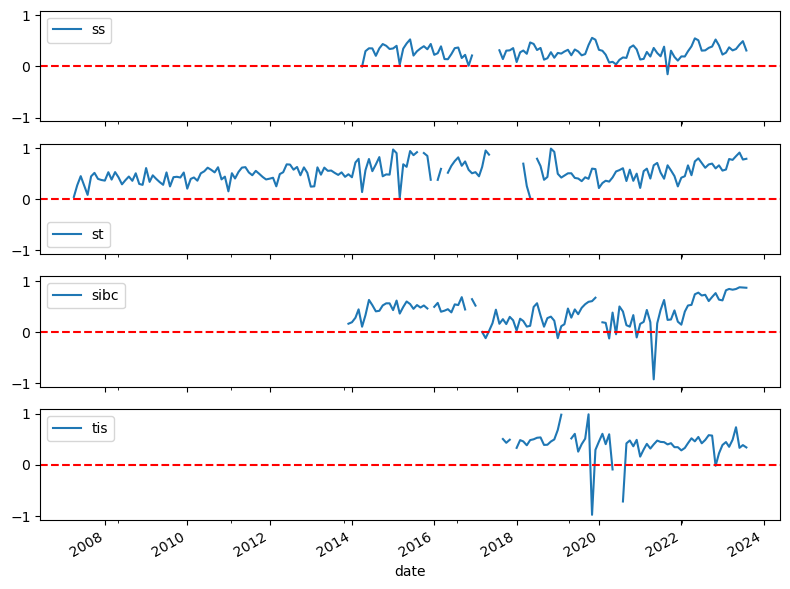

In [7]:
sib_sentiment, ax = plt.subplots(4, 1, figsize=(8, 6), sharex=True, sharey=True)
for idx, col in enumerate(["ss", "st", "sibc", "tis"]):
    sib_news_df.plot(x='date', y=col, label=col, ax=ax[idx])
    ax[idx].axhline(y=0, color='r', linestyle='--')
plt.tight_layout()

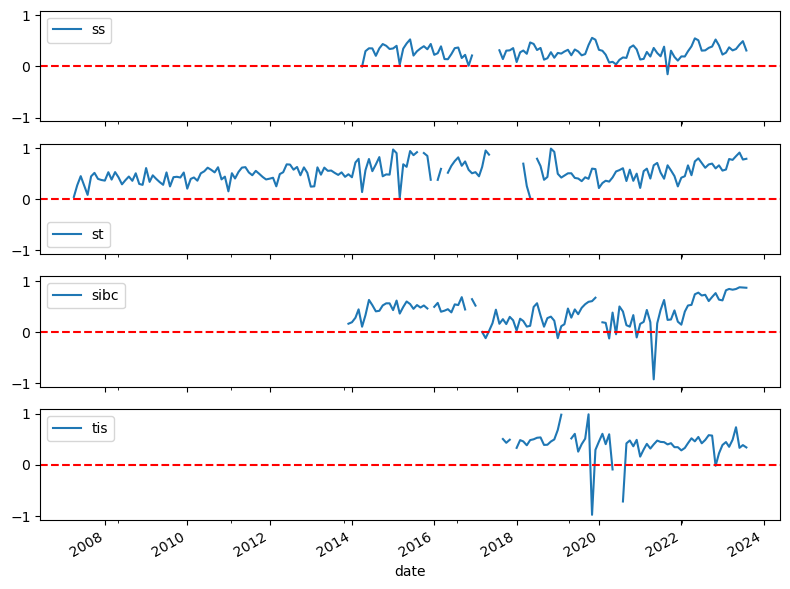

In [8]:
sib_sentiment

**WorkFlow**

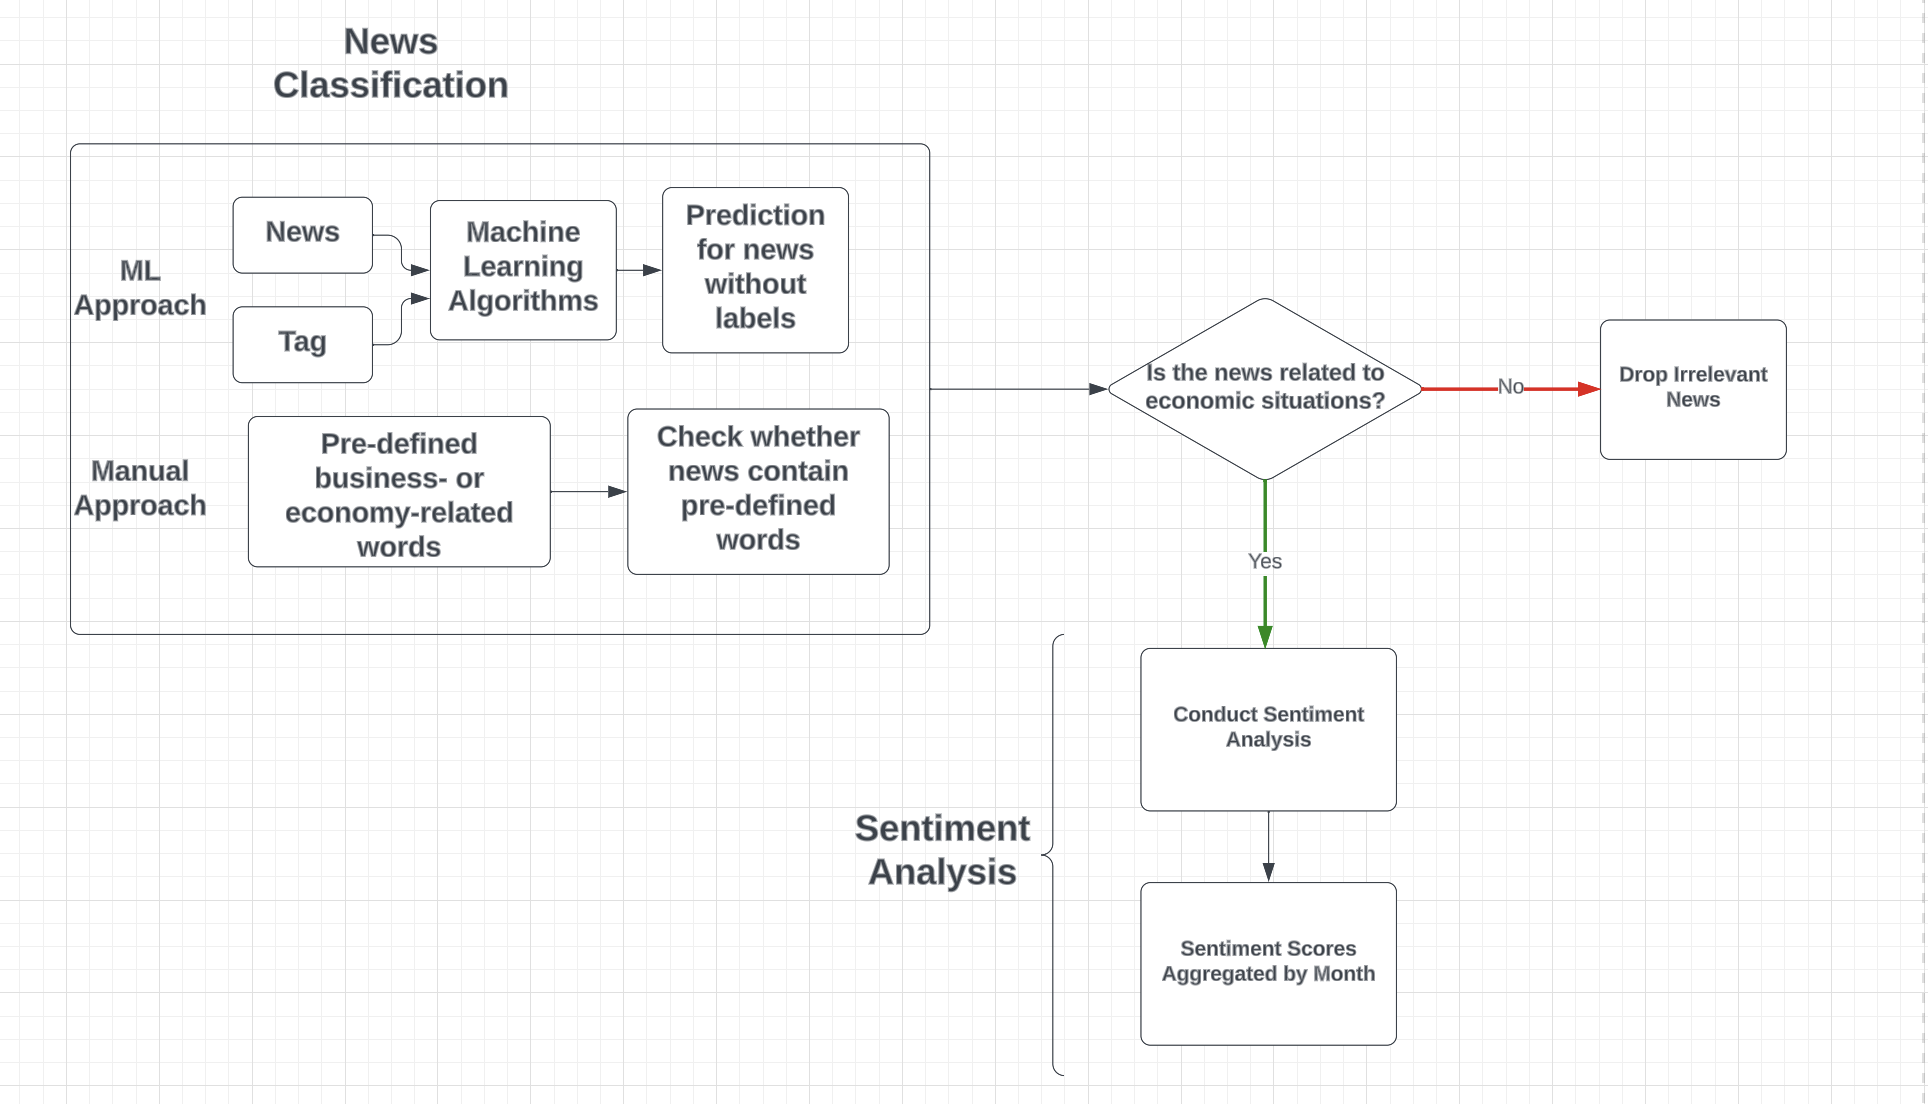

**Business/Economy Related Sentiment**
- Classification  
  - ML Approach
     - Best Algorithms: Logistic Regression with L1-penalty, with 76% accuracy on test data;
     - Pitfalls: The algorithm might not best identify the business/economy related sentiment because of the training data quality (tags from Solomon Times)
  - Manual Approach
      - Check whether the news contain pre-defined words ("business"/"economy"/"economic");
- Sentiment Analysis
  - Valence Aware Dictionary and sEntiment Reasoner (VADER) is a lexicon- and rule-based tool.
  - Compound score > 0.05 means positive; Compound score < -0.05 means negative;
    

## Google Trends

In [9]:
display(HTML(png_price_network))